<font size ='9'> Read Data and Set x,y

In [1]:
## Author Hongyi Zhang
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing

df=pd.read_csv("C:\\Users\\zhy92\\Desktop\\Stevens Master\\Classes\\2020 Spring\\CPE -695-WS Applied Machine Learning\\HW3\\Problems\\Titanic.csv")

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
Unnamed: 0    1309 non-null int64
pclass        1309 non-null object
survived      1309 non-null int64
name          1309 non-null object
sex           1309 non-null object
age           1046 non-null float64
sibsp         1309 non-null int64
parch         1309 non-null int64
ticket        1309 non-null object
fare          1308 non-null float64
cabin         295 non-null object
embarked      1307 non-null object
boat          486 non-null object
body          121 non-null float64
home.dest     745 non-null object
dtypes: float64(3), int64(4), object(8)
memory usage: 153.5+ KB


In [2]:
df['pclass'],_ = pd.factorize(df['pclass'])
df['sex'],_ = pd.factorize(df['sex'])
features=df[['pclass','sex','age','sibsp','survived']]
features=features.dropna()
print(features.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046 entries, 0 to 1308
Data columns (total 5 columns):
pclass      1046 non-null int64
sex         1046 non-null int64
age         1046 non-null float64
sibsp       1046 non-null int64
survived    1046 non-null int64
dtypes: float64(1), int64(4)
memory usage: 49.0 KB
None


In [3]:
x=features[['pclass','sex','age','sibsp']]
y=features.survived
print ('The shape of X is: ' + str(x.shape))
print ('The shape of Y is: ' + str(y.shape))

The shape of X is: (1046, 4)
The shape of Y is: (1046,)


In [4]:
print(x)

      pclass  sex      age  sibsp
0          0    0  29.0000      0
1          0    1   0.9167      1
2          0    0   2.0000      1
3          0    1  30.0000      1
4          0    0  25.0000      1
...      ...  ...      ...    ...
1301       2    1  45.5000      0
1304       2    0  14.5000      1
1306       2    1  26.5000      0
1307       2    1  27.0000      0
1308       2    1  29.0000      0

[1046 rows x 4 columns]


In [5]:
print(y)

0       1
1       1
2       0
3       0
4       0
       ..
1301    0
1304    0
1306    0
1307    0
1308    0
Name: survived, Length: 1046, dtype: int64


In [6]:
print(np.count_nonzero(y == 1),np.count_nonzero(y == 0))

427 619


In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

<font size='9'> Nerual Network with two hidden Layers

In [16]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam',activation='logistic', alpha=0.00005, hidden_layer_sizes=(100, 2),max_iter=5000,random_state=20)
clf=clf.fit(x_train,y_train)
clf

MLPClassifier(activation='logistic', alpha=5e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=5000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=20, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [17]:
pred=clf.predict(x_test)
pred

array([1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,

In [18]:
print (clf.n_layers_)
print (clf.n_iter_)
print (clf.loss_)
print (clf.out_activation_)

4
475
0.46794833266343194
logistic


In [19]:
print('out of sample accuracy is:',clf.score(x_test,y_test))

out of sample accuracy is: 0.8598726114649682


In [20]:
print('in sample accuracy is:',clf.score(x_train,y_train))

in sample accuracy is: 0.8005464480874317


In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)
cm

array([[176,  14],
       [ 30,  94]], dtype=int64)

<font size='9'> Campare Accuarcy

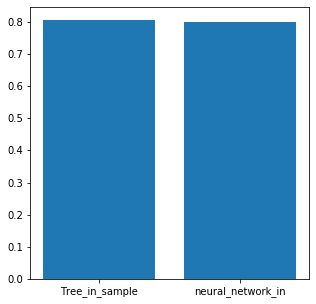

In [33]:
import matplotlib.pyplot as plt
groups1=['Tree_in_sample','neural_network_in']
values1=[0.8056768558951966,0.8005464480874317]
plt.figure(figsize=(5, 5))
plt.bar(groups1,values1)
plt.show()

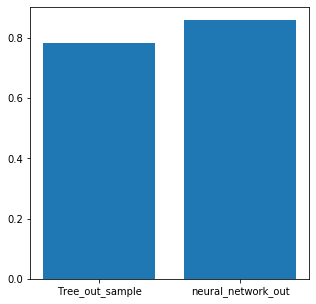

In [34]:
groups2=['Tree_out_sample','neural_network_out']
values2=[0.7837150127226463,0.8598726114649682]
plt.figure(figsize=(5, 5))
plt.bar(groups2,values2)
plt.show()